# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
orig_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
orig_df.sample(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1103,l471,Ceftamin,Female,7,28,0,45.000000,0
1336,p136,Zoniferol,Female,5,28,5,49.273971,0
1170,m269,Stelasyn,Female,22,28,0,45.000000,0
48,g791,Ramicane,Male,11,16,40,31.369406,1
1059,k603,Propriva,Male,2,27,0,45.000000,0
495,a366,Stelasyn,Female,16,29,5,48.951368,0
289,c458,Ramicane,Female,23,20,30,38.342008,2
402,u196,Ramicane,Male,18,25,5,45.557464,1
1609,v295,Naftisol,Female,2,27,15,50.666054,2
393,e662,Ramicane,Male,8,24,10,46.409084,0


In [227]:
# Checking the number of mice.
mice_ct = orig_df["Mouse ID"].nunique()

mice_ct

249

In [228]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupe_mice = orig_df.loc[orig_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
#https://stackoverflow.com/questions/61964973/pandas-get-column-value-where-row-matches-condition?noredirect=1&lq=1

dupe_mice

array(['g989'], dtype=object)

In [229]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = orig_df.loc[orig_df['Mouse ID']== dupe_mice[0]]

g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [230]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = orig_df.loc[(orig_df['Mouse ID'] != 'g989')]                        
                        
clean_df.sample(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1003,j365,Zoniferol,Male,24,28,45,64.294085,2
523,a492,Stelasyn,Male,20,25,45,60.122011,1
1163,l872,Placebo,Male,19,30,0,45.000000,0
622,b879,Stelasyn,Female,4,26,20,53.983436,1
1170,m269,Stelasyn,Female,22,28,0,45.000000,0
412,q597,Ramicane,Male,20,25,5,45.766111,0
1210,n304,Naftisol,Male,9,26,20,49.253309,1
1781,x773,Placebo,Female,21,30,15,47.671236,3
1450,r107,Propriva,Female,2,28,25,57.706667,1
895,g570,Propriva,Male,16,29,5,47.656424,1


In [231]:
# Checking the number of mice in the clean DataFrame.
updated_ct = clean_df["Mouse ID"].nunique()
updated_ct

248

## Summary Statistics

In [232]:
#Generate a summary statistics table of mean, median, variance, standard deviation, 
    #and SEM of the tumor volume for each regime using groupby and summary statistical methods to calculate

mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [233]:
# Assemble the resulting series into a single summary DataFrame.
stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Standard Deviation ":std,
    " Tumor Volume SEM":sem
})

stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [234]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

In [235]:
#find the number of rows for each regimen
mice_per_reg = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
mice_per_reg

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

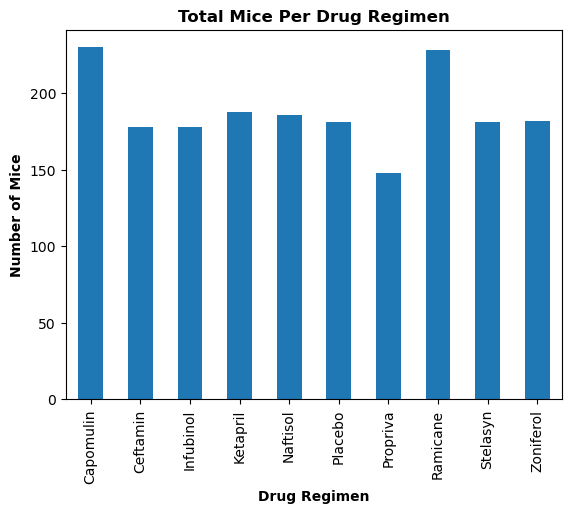

In [236]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Use DataFrame.plot() in order to create a bar chart of the data
pd_bar_mice_reg = mice_per_reg.plot(kind="bar", width=(.5))
plt.title("Total Mice Per Drug Regimen", fontweight ='bold')
plt.xlabel("Drug Regimen", fontweight ='bold')
plt.ylabel("Number of Mice", fontweight ='bold')

plt.show()

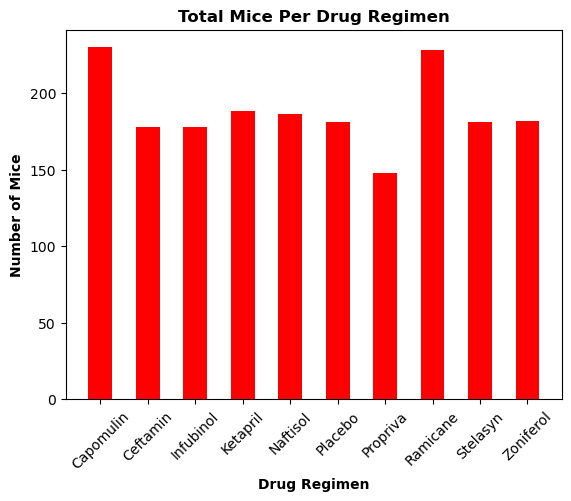

In [237]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot

# x axis is the name of each drug, y is # of rows for each
reg_names = list(mice_per_reg.index.values)
x_label = plt.xlabel("Drug Regimen", fontweight ='bold')
plt.xticks(rotation=45)
y_label = plt.ylabel("Number of Mice", fontweight ='bold')


plt.bar(reg_names, mice_per_reg, color="r", width=0.5)
plt.title("Total Mice Per Drug Regimen", fontweight ='bold')

plt.show()

In [238]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df.groupby(["Sex"])['Sex'].count()
gender

Sex
Female    922
Male      958
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Mice Gender')

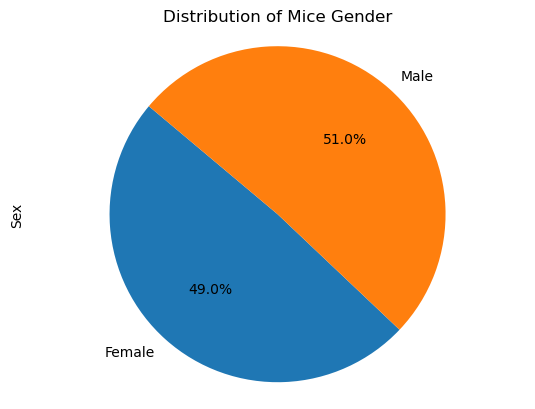

In [239]:
#pandaspie
pd_pie_gender = gender.plot(kind='pie',  autopct="%1.1f%%", startangle=140)
plt.axis('equal')
pd_pie_gender.set_title(label='Distribution of Mice Gender')

<function matplotlib.pyplot.close(fig=None)>

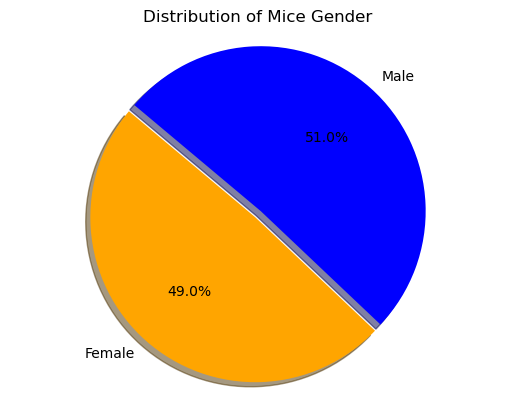

In [240]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0.05,0)
labels=['Female', 'Male']
sizes= gender
colors=["orange","blue",]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(label='Distribution of Mice Gender')
plt.axis("equal")
plt.show
plt.close

## Quartiles, Outliers and Boxplots

In [241]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse {max for each mouse}
#final_combined = clean_df.groupby(['Drug Regimen','Mouse ID']).max()[['Timepoint','Tumor Volume (mm3)']]
final_combined = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(orig_df, final_combined, on='Mouse ID')
final_df.sample(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
1568,u149,Ceftamin,Male,24,29,20,50.378058,0,25
835,f394,Zoniferol,Male,19,30,0,45.000000,0,5
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
906,g867,Stelasyn,Female,9,25,10,48.183402,0,15
1014,k210,Ceftamin,Male,15,28,15,51.073558,0,45
887,g558,Propriva,Male,8,29,10,50.094754,0,40
1703,w575,Zoniferol,Female,16,28,30,60.153065,1,45
1160,m269,Stelasyn,Female,22,28,15,55.905344,0,45
776,e227,Placebo,Male,1,30,5,47.238011,0,45
677,c402,Stelasyn,Female,1,27,35,65.807963,2,45


In [242]:
# Put treatments into a list for for loop (and later for plot labels)
reg_names=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols=[]


# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for drug in reg_names:
    final_vol = final_combined_df.loc[final_combined_df['Drug Regimen']==drug]
    final_df = final_vol.loc[final_vol['Timepoint']==final_vol['Max Timepoint']]
    values=final_df["Tumor Volume (mm3)"]
    tumor_vols.append(values)

        # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
        #print amounts
    print(f"{drug}")
    print(f"The interquartile range for {drug} is: {iqr}")

         # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower bound for {drug} is: {lower_bound}")
    print(f"The upper bound for {drug} is: {upper_bound}")
    
        #outliers
    outliers = (values.loc[(final_df['Tumor Volume (mm3)'] <= lower_bound) | (final_df['Tumor Volume (mm3)'] >= upper_bound)]).count()
    list_out= (values.loc[(final_df['Tumor Volume (mm3)'] <= lower_bound) | (final_df['Tumor Volume (mm3)'] >= upper_bound)]).values
        #results
    print(f"{drug} potential outliers are below {lower_bound} and above {upper_bound}.")
    print(f" Num of Outliers: {outliers}, {list_out}")
    print(f'--------------------------------------------------------')

Capomulin
The interquartile range for Capomulin is: 7.781863460000004
The lower bound for Capomulin is: 20.70456164999999
The upper bound for Capomulin is: 51.83201549
Capomulin potential outliers are below 20.70456164999999 and above 51.83201549.
 Num of Outliers: 0, []
--------------------------------------------------------
Ramicane
The interquartile range for Ramicane is: 9.098536719999998
The lower bound for Ramicane is: 17.912664470000003
The upper bound for Ramicane is: 54.30681135
Ramicane potential outliers are below 17.912664470000003 and above 54.30681135.
 Num of Outliers: 0, []
--------------------------------------------------------
Infubinol
The interquartile range for Infubinol is: 11.477135160000003
The lower bound for Infubinol is: 36.83290494999999
The upper bound for Infubinol is: 82.74144559000001
Infubinol potential outliers are below 36.83290494999999 and above 82.74144559000001.
 Num of Outliers: 1, [36.3213458]
--------------------------------------------------

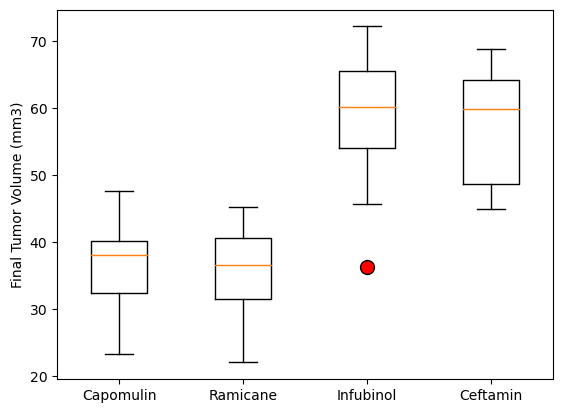

In [243]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

plt.boxplot(tumor_vols, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()



## Line and Scatter Plots

In [244]:
# dataframe for only Capomulin Regimen
Cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
Cap_df.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
340,w150,Capomulin,Male,23,23,10,39.952347,0
336,j119,Capomulin,Female,7,23,40,44.585090,1
379,l509,Capomulin,Male,17,21,40,40.770813,2
374,l509,Capomulin,Male,17,21,15,47.488599,1


In [245]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#mouse_id = 'v923'
cap_mouse_df = Cap_df.loc[Cap_df['Mouse ID'] == 'v923']
cap_mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
341,v923,Capomulin,Female,19,21,0,45.000000,0
342,v923,Capomulin,Female,19,21,5,45.704434,0
343,v923,Capomulin,Female,19,21,10,39.848223,0
344,v923,Capomulin,Female,19,21,15,40.457989,0
345,v923,Capomulin,Female,19,21,20,39.648296,0
346,v923,Capomulin,Female,19,21,25,40.156413,1
347,v923,Capomulin,Female,19,21,30,40.752216,2
348,v923,Capomulin,Female,19,21,35,41.439242,2
349,v923,Capomulin,Female,19,21,40,42.151015,2
350,v923,Capomulin,Female,19,21,45,40.658124,2


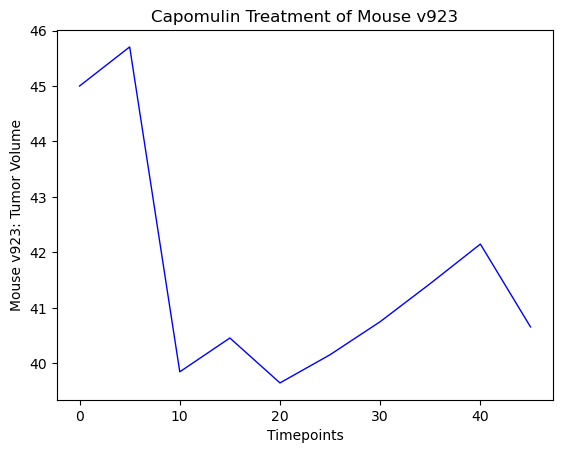

In [246]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse_df = Cap_df.loc[Cap_df['Mouse ID'] == 'v923']

## plotting a line graph
plt.title("Capomulin Treatment of Mouse v923")
plt.ylabel("Mouse v923: Tumor Volume")
plt.xlabel("Timepoints")
plt.plot(cap_mouse_df["Timepoint"], cap_mouse_df["Tumor Volume (mm3)"],color="blue", linewidth=1)
plt.show()
  
plt.close()
#VAIABLES? tumor_vol ['Timepoint']

C:\Users\rodne\AppData\Local\Temp\ipykernel_5736\1159022227.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Cap_df_mice = Cap_df.groupby('Mouse ID').mean()


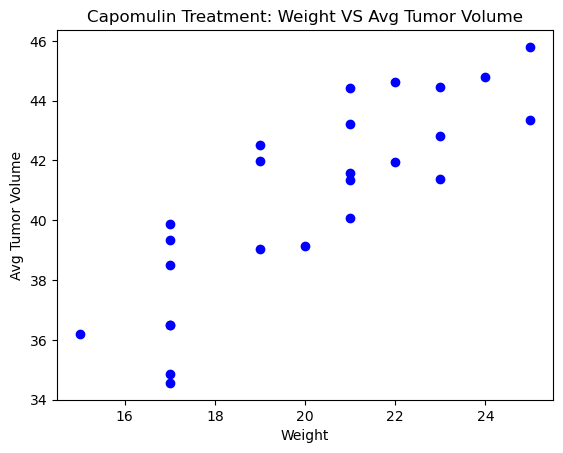

In [260]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
plt.title("Capomulin Treatment: Weight VS Avg Tumor Volume")
plt.ylabel("Avg Tumor Volume")
plt.xlabel("Weight")


#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html#pandas.core.groupby.DataFrameGroupBy.mean
Cap_df_mice = Cap_df.groupby('Mouse ID').mean()
x_axis = Cap_df_mice['Weight (g)']
tumor_mean = Cap_df_mice['Tumor Volume (mm3)']


# Generate a scatter plot
plt.scatter(x_axis, tumor_mean, color="blue")

#Cap_df.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize=(8,8), title="Capomulin Treatment: Weight vs. Avg Tumor Volume")
    
#plt.scatter(wdi_data.iloc[:,1],wdi_data.iloc[:,8])
plt.show(), x_axis , tumor_mean
plt.close()

## Correlation and Regression

The correlation between both factors is 0.84


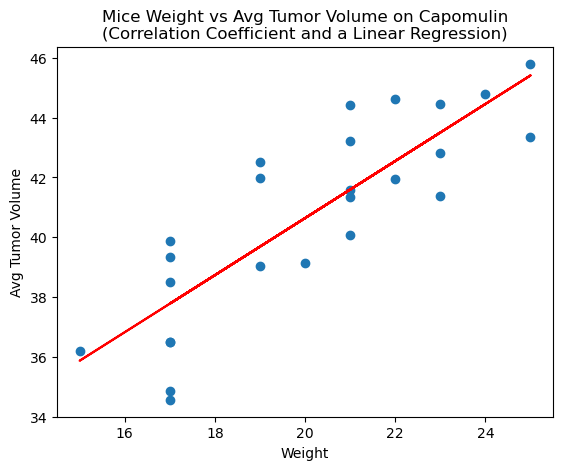

In [261]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = x_axis
y_values = tumor_mean 

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.title("Mice Weight vs Avg Tumor Volume on Capomulin\n(Correlation Coefficient and a Linear Regression)")
plt.ylabel("Avg Tumor Volume")
plt.xlabel("Weight")
plt.show()

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen




# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('images/scatter_weight_tumor_linear.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()
